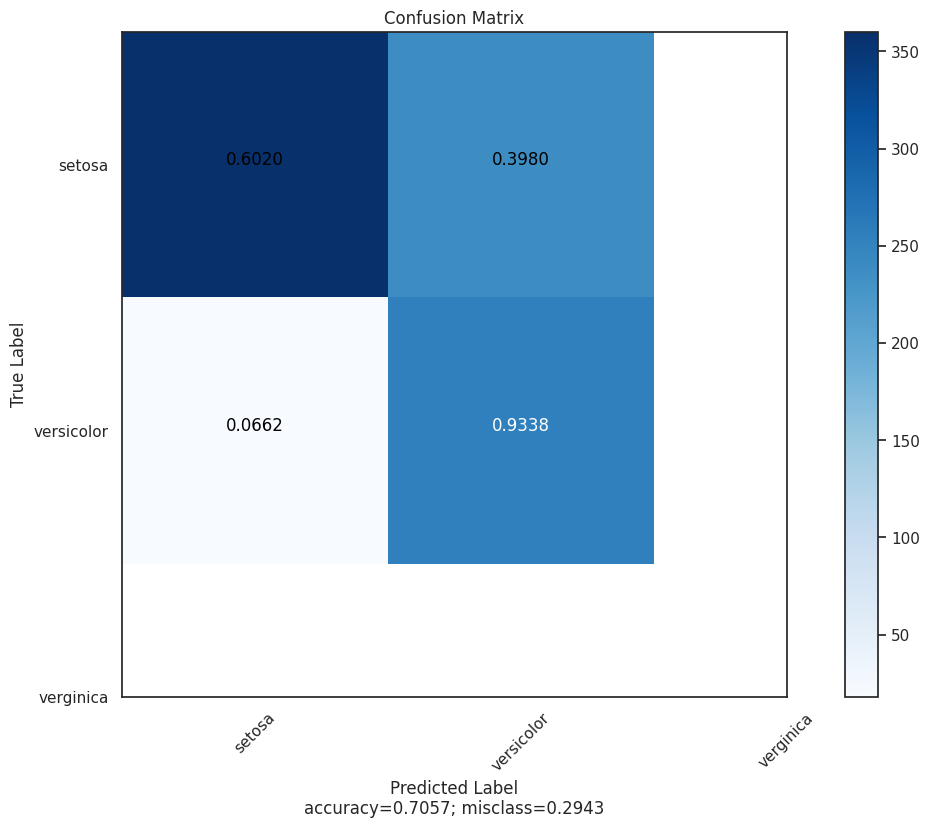

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, pair_confusion_matrix
sns.set_theme(style='white')


#Load data
data = pd.read_csv("Iris.csv")
data.head()

def fix_col_names(col):
  return col.strip(" (Cm)").replace(" ", "_")

data.columns = [fix_col_names(col) for col in data.columns]
data.columns.tolist()
feature_columns = data.columns.tolist()[:4]

data["sepal_length_width_ratio"] = data["sepal_length"]/ data["sepal_width"]
data["petal_length_width_ratio"] = data["petal_length"]/ data["petal_width"]

data = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_length_width_ratio', 'petal_length_width_ratio', 'target']]


map = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
data["target"] = data["target"].map(map)
X = data.drop(["target"],axis = 1).values.astype("float32")
y = data["target"].values.astype("int32")
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

#Logistic Regression
logreg = LogisticRegression(C= 0.0001, solver = "lbfgs", max_iter= 100,multi_class= "multinomial")
logreg.fit(X_train,y_train)
predictions_lr = logreg.predict(X_test)
cm = pair_confusion_matrix(y_test,predictions_lr)
f1 = f1_score(y_test,predictions_lr,average = "micro")
prec = precision_score(y_test,predictions_lr,average = "micro")
recall = recall_score(y_test,predictions_lr,average = "micro")

#Accuracy
logreg_train_acc = logreg.score(X_train,y_train)
logreg_test_acc = logreg.score(X_test,y_test)

#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions_rf = rf.predict(X_test)
cm_rf = pair_confusion_matrix(y_test,predictions_rf)
f1_rf = f1_score(y_test,predictions_rf,average = "micro")
prec_rf = precision_score(y_test,predictions_rf,average = "micro")
recall_rf = recall_score(y_test,predictions_rf,average = "micro")

#Accuracy
rf_train_acc = rf.score(X_train,y_train)
rf_test_acc = rf.score(X_test,y_test)

#CM and FI
def plot_cm(cm, target_name, title="Confusion Matrix", cmap=None, normalize=True):

    accuracy = np.trace(cm)/float(np.sum(cm))
    misclass = 1-accuracy

    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(12,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_name is not None:
        tick_marks = np.arange(len(target_name))
        plt.xticks(tick_marks, target_name, rotation=45)
        plt.yticks(tick_marks, target_name)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()/1.5 if normalize else cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i , "{:0.4f}".format(cm[i,j]),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else 'black')

        else:
            plt.text(j, i , "{:,}".format(cm[i,j]),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('ConfusionMatrix.png', dpi=120)
    plt.show()

target_name = np.array(['setosa', 'versicolor', 'verginica'])
plot_cm(cm, target_name, title="Confusion Matrix", cmap=None, normalize=True)

#Feature importance
importances = rf.feature_importances_
labels = data.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns = ['feature', 'importance'])
features = feature_df.sort_values(by='importance', ascending=False)

axis=14
title=12
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='importance', y='feature', data=features)
ax.set_xlabel('Importance', fontsize=axis)
ax.set_ylabel('Feature', fontsize=axis)
ax.set_title('Random Forst Feature Importances', fontsize=title)
plt.tight_layout()
plt.savefig('FeatureImportance.png')
plt.close()

with open('scores.txt',"w") as score:
    score.write("Random Forest Train Var: %2.1f%%\n" %  rf_train_acc)
    score.write("Random Forest Test Var: %2.1f%%\n" %  rf_test_acc)
    score.write("F1 Score: %2.1f%%\n" %  f1_rf)
    score.write("Recall Score: %2.1f%%\n" %  recall_rf)
    score.write("Precision Score: %2.1f%%\n" %  prec_rf)

    score.write("\n")
    score.write("\n")

    score.write("Logistic Regression Train Var: %2.1f%%\n" %  logreg_train_acc)
    score.write("Logistic Regression Test Var: %2.1f%%\n" %  logreg_test_acc)
    score.write("F1 Score: %2.1f%%\n" %  f1)
    score.write("Recall Score: %2.1f%%\n" %  recall)
    score.write("Precision Score: %2.1f%%\n" %  prec)

